In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
df = pd.read_csv('titanic.csv', index_col='PassengerId')

In [4]:
'''
    1.Какое количество мужчин и женщин ехало на корабле? В качестве ответа приведите два числа через пробел.
'''

df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [58]:
'''
    2.Какой части пассажиров удалось выжить? Посчитайте долю выживших пассажиров. 
    Ответ приведите в процентах (число в интервале от 0 до 100, знак процента не нужен), округлив до двух знаков.
'''

round(100*(len(df[df['Survived']==1])/len(df)),2)

38.38

In [57]:
'''
    3.Какую долю пассажиры первого класса составляли среди всех пассажиров?
    Ответ приведите в процентах (число в интервале от 0 до 100, знак процента не нужен), 
    округлив до двух знаков.
'''

round(100*(len(df[df['Pclass']==1])/len(df)),2)

24.24

In [65]:
'''
    4.Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров.
    В качестве ответа приведите два числа через пробел.
'''

df['Age'].mean(), df['Age'].std()

(29.69911764705882, 14.526497332334044)

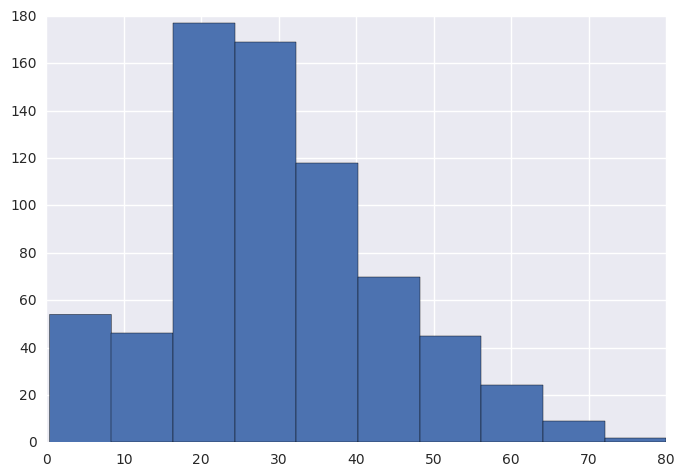

In [72]:
df['Age'].hist()
plt.show()

In [73]:
'''
    5.Коррелируют ли число братьев/сестер/супругов с числом родителей/детей?
    Посчитайте корреляцию Пирсона между признаками SibSp и Parch.
'''

df['SibSp'].corr(df['Parch'], method='pearson', min_periods=None)

0.41483769862015663

In [102]:
'''
    6.Какое самое популярное женское имя на корабле? Извлеките из полного имени 
    пассажира (колонка Name) его личное имя (First Name). Это задание — типичный 
    пример того, с чем сталкивается специалист по анализу данных. Данные очень разнородные
    и шумные, но из них требуется извлечь необходимую информацию. Попробуйте вручную 
    разобрать несколько значений столбца Name и выработать правило для извлечения имен, 
    а также разделения их на женские и мужские.
    
    https://github.com/tyz910/hse-shad-ml
'''


import re
def clean_name(name):
    # Первое слово до запятой - фамилия
    s = re.search('^[^,]+, (.*)', name)
    if s:
        name = s.group(1)

    # Если есть скобки - то имя пассажира в них
    s = re.search('\(([^)]+)\)', name)
    if s:
        name = s.group(1)

    # Удаляем обращения
    name = re.sub('(Miss\. |Mrs\. |Ms\. )', '', name)

    # Берем первое оставшееся слово и удаляем кавычки
    name = name.split(' ')[0].replace('"', '')

    return name


names = df[df['Sex'] == 'female']['Name'].map(clean_name)
name_counts = names.value_counts()

In [103]:
fn = df[df['Sex'] == 'female']['Name']

def extract_first_name(name):
    """
    Функция извлечения first name from name
    :param name: name
    :return: first name
    """
    # первое слово в скобках
    m = re.search(".*\\((.*)\\).*", name)
    if m is not None:
        return m.group(1).split(" ")[0]
    # первое слово после Mrs. or Miss. or else
    m1 = re.search(".*\\. ([A-Za-z]*)", name)
    return m1.group(1)

# получаем имя с максимальной частотой
r = fn.map(lambda full_name: extract_first_name(full_name)).value_counts().idxmax()
print(r)

Anna
